In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()

df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)

df['target'] = breast_cancer_data.target

display(df.head())
display(df.info())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

None

In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [ ]:
print("\nData types:")
display(df.info())

X = df.drop('target', axis=1)
y = df['target']

print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness er

None


Features (X) shape: (569, 30)
Target (y) shape: (569,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nScaled features (X_scaled) shape:", X_scaled.shape)


Scaled features (X_scaled) shape: (569, 30)


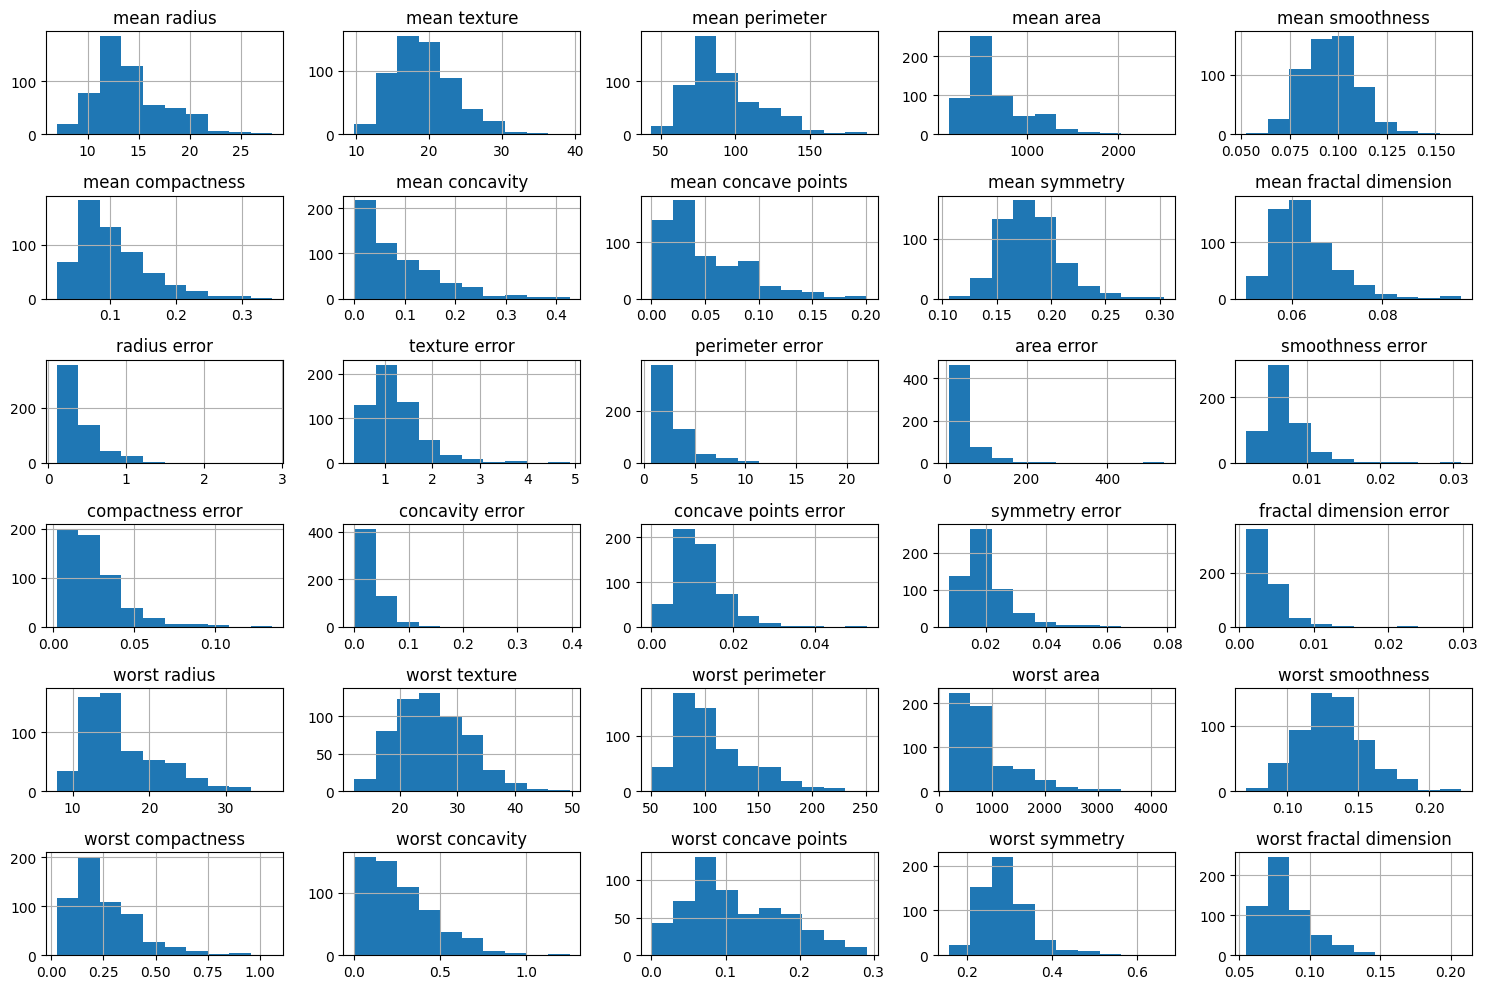

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for each feature (excluding target)
df.drop('target', axis=1).hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

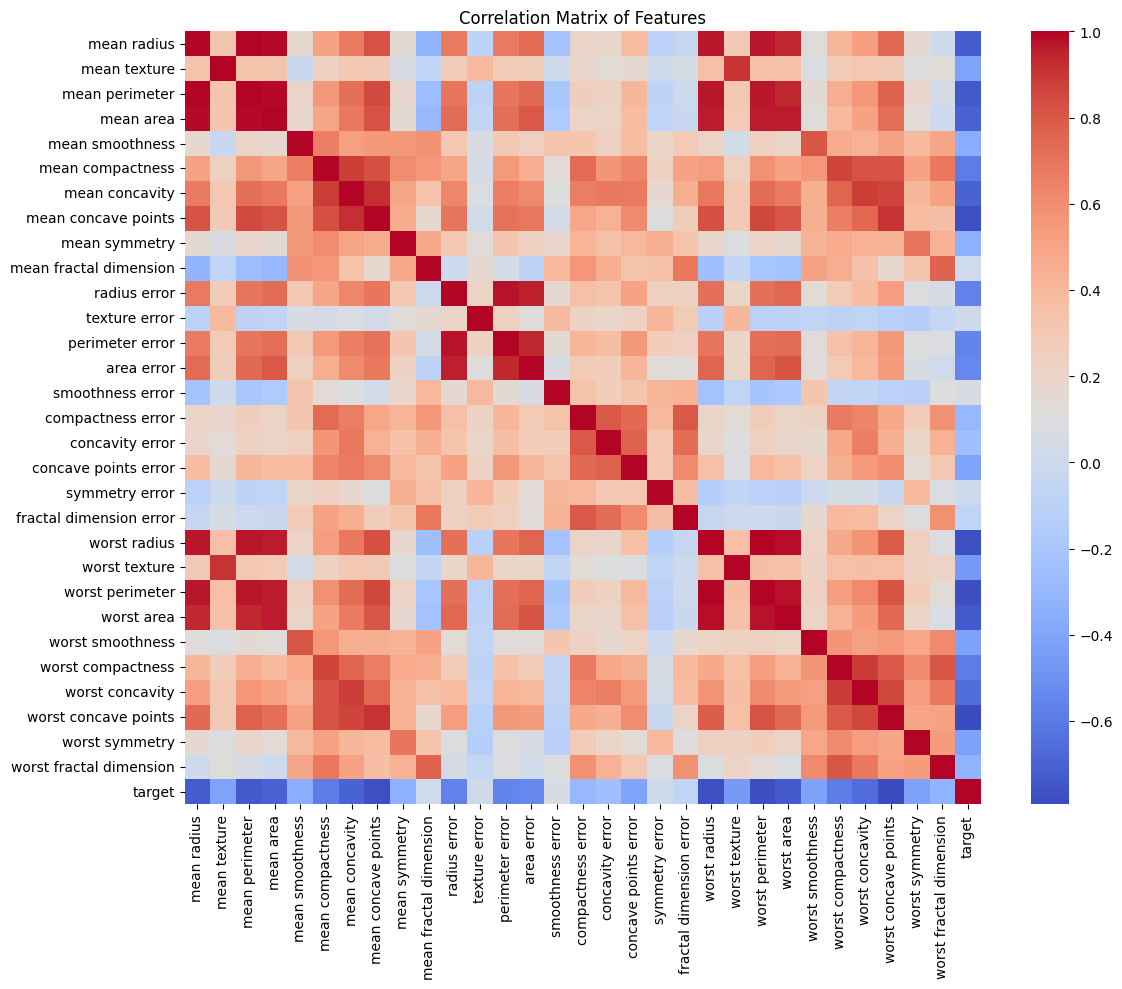

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

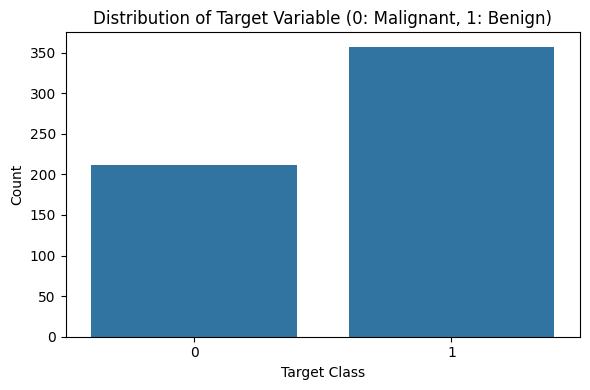

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable (0: Malignant, 1: Benign)')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
correlations = df.corr()['target'].abs().sort_values(ascending=False)

print("Absolute Correlation with Target Variable:")
print(correlations)

Absolute Correlation with Target Variable:
target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension err

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

k_best_features = 15
select_k_best = SelectKBest(score_func=chi2, k=k_best_features)

select_k_best.fit(X, y)

selected_feature_indices = select_k_best.get_support(indices=True)

selected_feature_names = X.columns[selected_feature_indices]

print(f"\nSelected {k_best_features} Features using SelectKBest (chi2):")
print(selected_feature_names)

X_selected = pd.DataFrame(X_scaled[:, selected_feature_indices], columns=selected_feature_names)

print("\nFirst 5 rows of the selected features DataFrame:")
display(X_selected.head())


Selected 15 Features using SelectKBest (chi2):
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean concavity', 'radius error', 'perimeter error', 'area error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst compactness', 'worst concavity', 'worst concave points'],
      dtype='object')

First 5 rows of the selected features DataFrame:


,mean radius,mean texture,mean perimeter,mean area,mean concavity,radius error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
0,1.097064,-2.073335,1.269934,0.984375,2.652874,2.489734,2.833031,2.487578,1.886690,-1.359293,2.303601,2.001237,2.616665,2.109526,2.296076
1,1.829821,-0.353632,1.685955,1.908708,-0.023846,0.499255,0.263327,0.742402,1.805927,-0.369203,1.535126,1.890489,-0.430444,-0.146749,1.087084
2,1.579888,0.456187,1.566503,1.558884,1.363478,1.228676,0.850928,1.181336,1.511870,-0.023974,1.347475,1.456285,1.082932,0.854974,1.955000
3,-0.768909,0.253732,-0.592687,-0.764464,1.915897,0.326373,0.286593,-0.288378,-0.281464,0.133984,-0.249939,-0.550021,3.893397,1.989588,2.175786
4,1.750297,-1.151816,1.776573,1.826229,1.371011,1.270543,1.273189,1.190357,1.298575,-1.466770,1.338539,1.220724,-0.313395,0.613179,0.729259


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)

    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

print("\n--- Model Evaluation Results ---")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

Training data shape: (455, 15)
Testing data shape: (114, 15)

Training Logistic Regression...
Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.9737

Training Random Forest...
Evaluating Random Forest...
Random Forest Accuracy: 0.9561

Training Support Vector Machine...
Evaluating Support Vector Machine...
Support Vector Machine Accuracy: 0.9737

Training Decision Tree...
Evaluating Decision Tree...
Decision Tree Accuracy: 0.9211

Training K-Nearest Neighbors...
Evaluating K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.9737

--- Model Evaluation Results ---
Logistic Regression: 0.9737
Random Forest: 0.9561
Support Vector Machine: 0.9737
Decision Tree: 0.9211
K-Nearest Neighbors: 0.9737


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')

print("Performing GridSearchCV for SVC...")
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_estimator = grid_search.best_estimator_

print("\nBest hyperparameters found by GridSearchCV:")
print(best_params)

Performing GridSearchCV for SVC...

Best hyperparameters found by GridSearchCV:
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
y_pred_tuned = best_estimator.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print("\nAccuracy of the tuned SVC model on the test set:")
print(f"Accuracy: {accuracy_tuned:.4f}")

initial_svc_accuracy = results['Support Vector Machine']
print(f"\nInitial SVC Accuracy: {initial_svc_accuracy:.4f}")


Accuracy of the tuned SVC model on the test set:
Accuracy: 0.9737

Initial SVC Accuracy: 0.9737


Classification Report for Tuned SVC Model:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



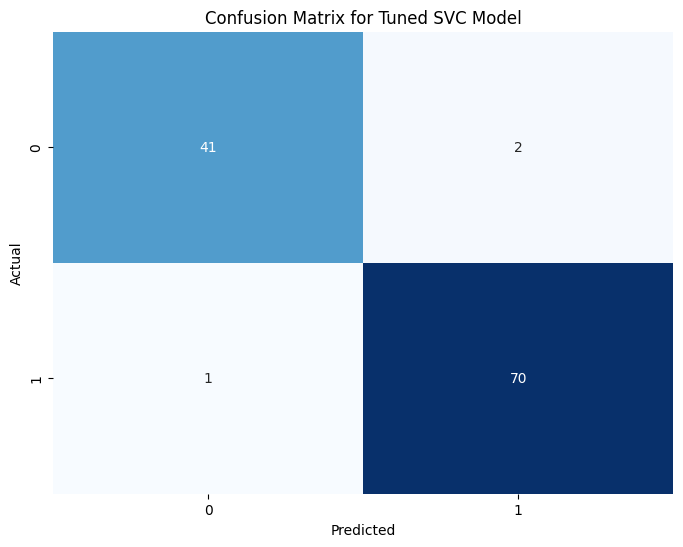

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report for Tuned SVC Model:")
print(classification_report(y_test, y_pred_tuned))

conf_matrix = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tuned SVC Model')
plt.show()

In [ ]:
import joblib

model_filename = 'tuned_svc_model.joblib'
joblib.dump(best_estimator, model_filename)

print(f"Tuned SVC model saved to {model_filename}")

Tuned SVC model saved to tuned_svc_model.joblib
